# 8. 비지도학습

## 8-1. 들어가며

### 학습 내용
---
1. 비지도학습(Unsupervised Learning)에 대하여
- 비지도학습의 기본적인 개념에 대해 살펴봅니다.
2. 클러스터링
- (1) K-means
- (2) DBSCAN
3. 차원 축소
- (1) PCA
- (2) T-SNE

### 학습 목표
---
그동안 우리가 주로 배워온 딥러닝 모델들이 주로 수행하는 작업들은 대부분 무언가(X)를 분류하는 것들이었습니다. 이러한 분류 작업들을 위해서는 반드시 정답(y)으로 제시되는 분류 기준이 필요합니다.
 이렇게 정답 데이터를 통해 X가 무엇인지 분류하는 방법을 배우게 하는 학습 방법을 지도학습(Supervised Learning)이라고 합니다. 그러나 명확한 정답 데이터가 라벨(label)로 달려있지 않은 수많은 데이터들을 우리는 어떻게 다룰 수 있을까요? 그리고 그 데이터들로부터 어떤 정보를 얻어낼 수 있을까요?

오늘은 비지도학습(Unsupervised Learning)에 대해서 알아보겠습니다. 비지도학습의 개념, 지도학습과 비지도학습의 차이, 주요 비지도학습 알고리즘에 대해 학습합니다.

## 8-2. 비지도학습(Unsupervised Learning)에 대하여

비지도학습(Unsupervised learning)이란, 지도학습과 달리 training data로 정답(label)이 없는 데이터가 주어지는 학습방법을 말합니다.
다르게 말하면, 비지도학습은 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법이라고도 말할 수 있습니다. 아무도 정답을 알려주지 않은 채 오로지 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 판단하는 것이니까요.

지도학습의 대표적인 예인 분류(classification) 문제를 살펴볼까요? 우리는 해당 사진이 강아지인지 고양이인지 판단하는 신경망 분류 모델을 학습하려고 합니다. 그렇게 하기 위해서는 이에 적합한 딥러닝 모델과 훈련에 필요한 training dataset이 필요한데, 강아지 및 고양이의 사진과 각각의 사진들이 이것은 '강아지'이다, '고양이'이다 라고 표시한 label이 필요해요.

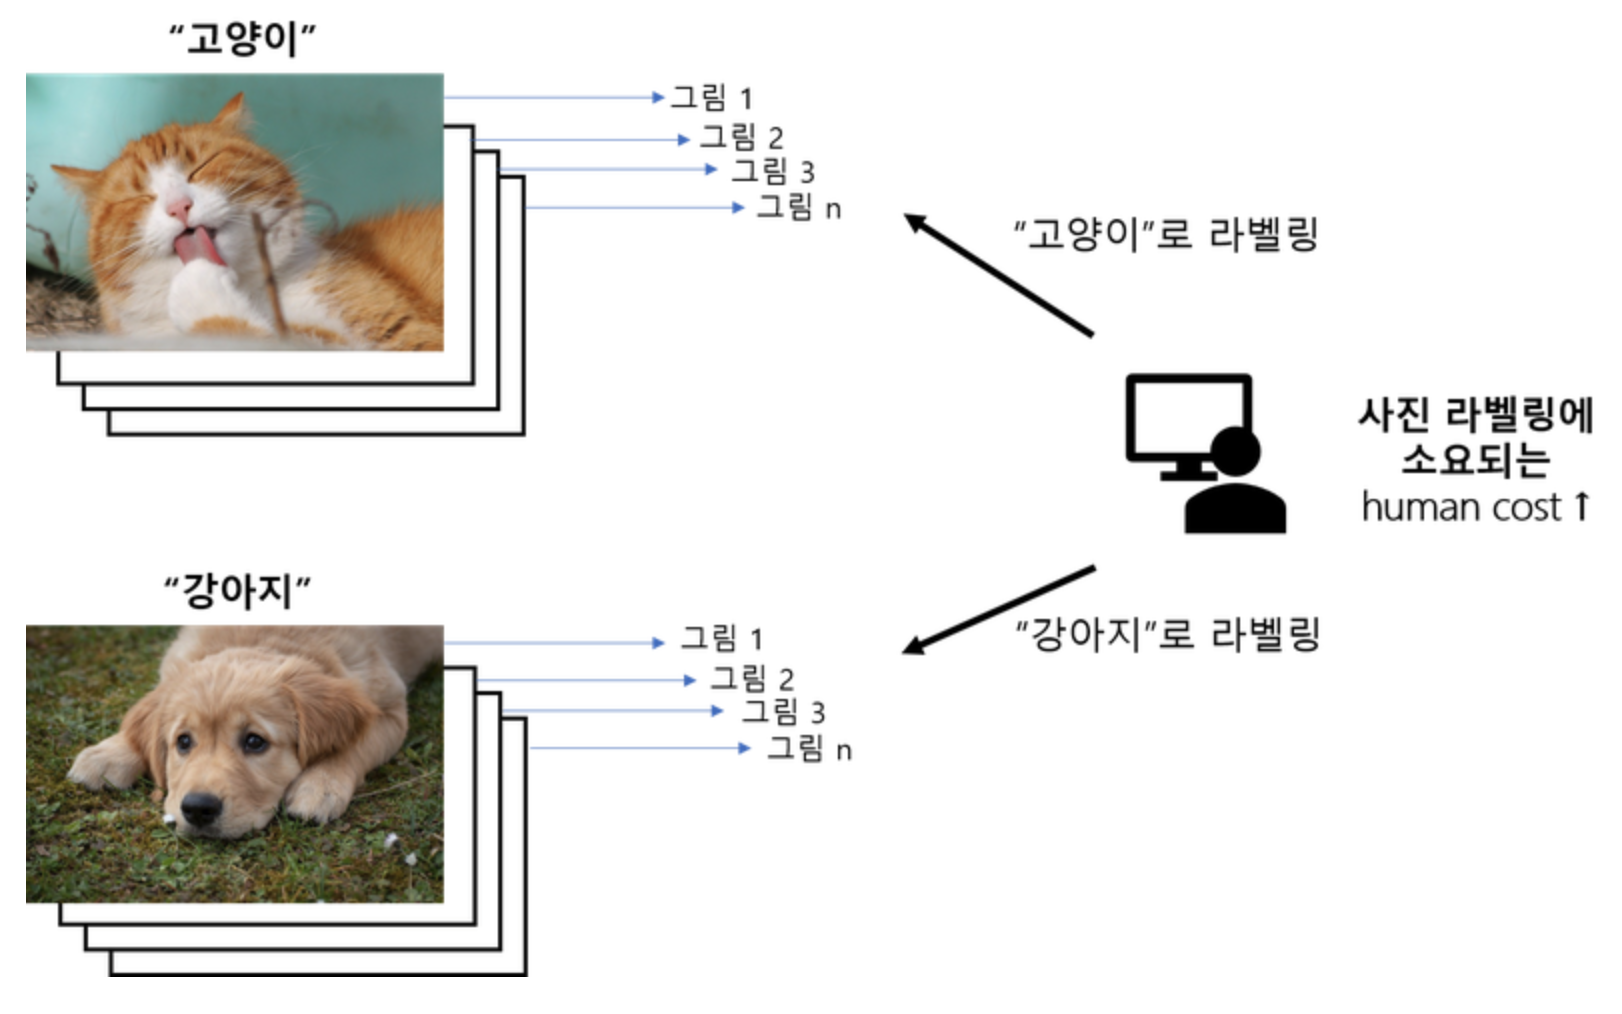

이렇게 모든 데이터셋에 각각에 대한 정보가 명시되어 있으면 좋겠지만, 그렇지 않은 경우가 대부분일뿐더러 라벨링이 되어 있는 데이터셋을 마련하기 위해서는 적지 않은 인적 자원이 소모된답니다. 결국 어떤 이미지가 고양이 사진이다, 강아지 사진이다라는 정답을 매기는 과정은 인간이 수행해야 하니까요.

이 문제를 해결하기 위해, 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론하는 비지도학습과 같은 방법론이 제시되었어요.

비지도학습의 대표적인 예시로는 군집화(클러스터링, clustering) 가 있지만, 비지도학습이라는 용어는 정답이 주어지지 않은 데이터를 이용한 학습 전체를 포괄하는 용어이기 때문에 클러스터링 외에도 차원 축소(dimensionality reduction) 및 이를 이용한 데이터 시각화, 생성 모델(generative model) 등 다양한 task를 포괄하는 개념입니다.

이번 노드에서는 클러스터링의 대표적인 알고리즘인 K-means와 DBSCAN 알고리즘, 차원 축소의 대표적인 방법인 PCA(Principal Component Analysis), T-SNE에 대해서 다뤄볼까 해요.

## 8-3. 클러스터링(1) K-means

지도학습 상황과 달리, 비지도학습이 필요한 상황에서는 지도학습 때 당연히 주어지던 몇 가지가 생략되어 있습니다. 우선은 데이터 X가 무엇인지에 대한 정답(label) y가 없습니다. 또 없는 게 있다면, y가 될 수 있는 분류 기준(클래스 또는 카테고리)도 없다고 할 수 있겠네요.

군집화(클러스터링)이란 그렇게 명확한 분류 기준이 없는 상황에서도 데이터들을 분석하여 가까운(또는 유사한) 것들끼리 묶어 주는 작업입니다. 이를 통해서 개별적인 데이터들을 몇 개의 그룹으로 추상화하여 새로운 의미를 발견해 나갈 수 있게 되겠죠. 그런데 명확한 분류 기준이 없다면 무엇을 기준으로 묶어낼 수 있을까요? 가장 쉽게 생각해 볼 수 있는 방법은 임의로 k개의 그룹으로 뭉쳐 보라고 하는 것이겠군요. 단 아무렇게나 뭉치진 말고 k개의 기준점을 중심으로 가장 가까운 데이터들을 뭉쳐 보는 방식으로요.

K-means 알고리즘은 k 값이 주어져 있을 때, 주어진 데이터들을 k 개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나입니다. 다음 예제 코드를 통해 K-means 알고리즘이 어떻게 동작하는지 살펴봅시다.

### 1. 데이터 생성
---
우선 모듈을 import하고 5개의 중심점을 기준으로 무작위 점 데이터 100개를 생성해 줍니다.

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


비지도학습에는 label이 없다고 했었는데 위 코드에는 label이 등장하네요? 그렇습니다. 임의로 지정한 k개의 중심점이 새로운 label 역할을 하는 것이 K-means 의 아이디어입니다.

그 다음, 생성한 데이터를 좌표에 그려볼 거예요.

,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


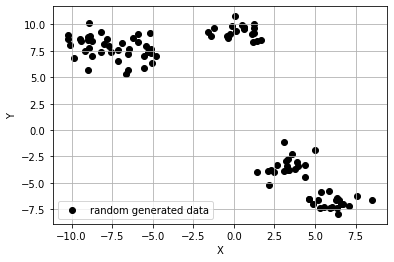

In [2]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

위와 같이 scikit-learn의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성해 보았습니다. 한눈에 보기에도 위의 데이터들은 5개의 군집을 이루고 있는 것처럼 보이는데요, 과연 k-means 알고리즘을 적용하여 위 데이터들을 올바르게 군집화할 수 있는지 알아봅시다.

### 2. 생성한 데이터에 K-means 알고리즘 적용
---
이제 K-means 알고리즘을 적용해 봅시다. 그런데, 데이터들끼리의 거리를 어떻게 측정하는 걸까요?

실은 우리는 위에서 자연스럽게 데이터를 X-Y 좌표축 위에 생성했습니다. 좌표축 위에 존재하는 데이터들 사이의 거리는 쉽게 계산해 낼 수 있죠? 피타고라스 정리를 응용하여 계산한 좌표축 사이의 두 점 사이의 직선거리를 유클리드 거리(Euclidian distance) 또는 L2 Distance라고 부릅니다. 자세한 설명은 아래 링크를 참고해 주세요.

- 군집분석(https://modulabs.co.kr/blog/cluster-analysis-clustering-grouping/)

**K-mean 알고리즘의 순서**

1. 원하는 클러스터의 수(K)를 결정합니다.
2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.
3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.
4. 각 K개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이 중심점은 실제로 존재하는 데이터가 아니어도 상관없습니다.)
5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.
6. 4.번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더 이상 바뀌지 않음)하게 됩니다.

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용
kmeans_cluster = KMeans(n_clusters=5)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1 2 3 4]


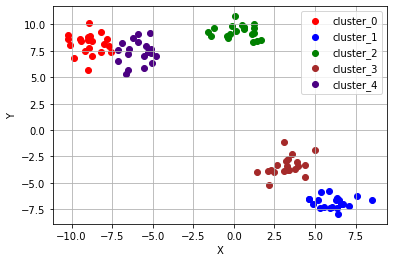

In [4]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'}

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

### 3. K-means 알고리즘이 잘 동작하지 않는 예시들
---
다음 코드를 통해 어떤 특성의 데이터들이 K-means 알고리즘을 적용하였을 때 잘 군집화되지 않는지 살펴보도록 해요.

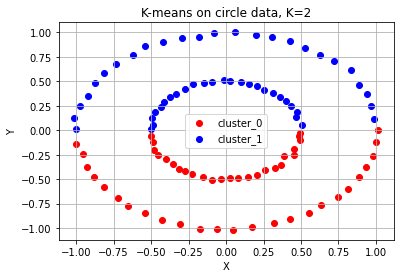

In [5]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

첫 번째 원형으로 분포되어 있는 데이터 같은 경우는 아마 대부분의 사람들이 '가운데 작은 원'과 '바깥쪽 큰 원' 두 개의 군집으로 분류하기를 원했을 거예요. 하지만 K-means 알고리즘은 이 데이터들을 마치 케잌을 칼로 자르듯이 반으로 나눴네요.

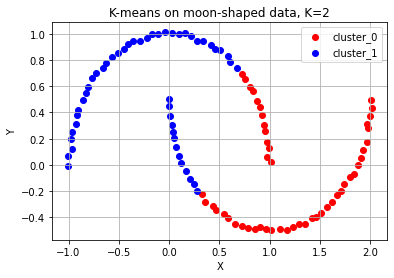

In [6]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

두 번째 초승달 모양의 데이터도 마찬가지예요. 두 개의 달 형태를 분리해서 군집화하지 않고, 이 역시 y축에 대하여 칼로 자른 형태의 느낌으로 두 개의 군집을 나눴네요.

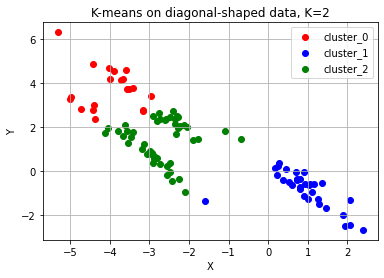

In [8]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

마지막으로 크게 3개의 대각선 방향으로 나열되어 있는 데이터들 역시 예상대로 군집을 이루지 않습니다.

이러한 예시를 통해, K-means 알고리즘은 다음과 같은 상황에서는 적합하지 않은 군집화 알고리즘이라는 것을 알 수 있어요.

군집의 개수(K 값)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다.
유클리드 거리가 가까운 데이터끼리 군집이 형성되기 때문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화를 성공적으로 수행하지 못할 수 있다.
그렇다면 위의 경우처럼 **군집의 개수를 명시하지 않으면서, 밀도 기반**으로 군집을 예측하는 방법이 있을까요?

## 8-4. 클러스터링(2) DBSCAN

DBSCAN(Density Based Spatial Clustering of Applications with Noise) 알고리즘은 가장 널리 알려진 밀도(density) 기반의 군집 알고리즘입니다. K-means 알고리즘을 사용하여 해결하기 어려웠던 문제들을 DBSCAN 알고리즘을 활용해 해결할 수 있어요.
DBSCAN 알고리즘의 가장 큰 특징 중 하나는 군집의 개수, 즉 K-means 알고리즘에서의 K 값을 미리 지정할 필요가 없다는 점입니다. 또한 유클리드 거리 기반의 K-means 알고리즘 방식과 달리, 조밀하게 몰려 있는 클러스터를 군집화하는 방식을 사용하기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을 수 있어요.

클러스터 중심점을 지정하지 않는다면 어떤 방식으로 클러스터링을 하는 걸까요? 우선 시각적으로 이해를 돕는 웹페이지를 소개하겠습니다.

클러스터 중심점을 지정하지 않는다면 어떤 방식으로 클러스터링을 하는 걸까요? 우선 시각적으로 이해를 돕는 웹페이지를 소개하겠습니다.

DBSCAN - primo.ai(http://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN))

위 사이트를 보시면 왜 DBSCAN이 밀도 기반 군집 알고리즘인지 이해가 되실 것입니다. K-means 알고리즘과는 달리, 클러스터가 최초의 임의의 점 하나로부터 점점 퍼져나가는데 그 기준이 바로 일정 반경 안의 데이터의 개수, 즉 데이터의 밀도이기 때문입니다.

### 1. DBSCAN 알고리즘의 동작
---
DBSCAN 알고리즘을 본격적으로 설명하기 전에 DBSCAN을 이해하는 데 필요한 변수와 용어 정리가 필요해요. 각각의 변수 및 용어에 대한 설명은 다음과 같아요.

- epsilon: 클러스터의 반경
- minPts: 클러스터를 이루는 개체의 최솟값
- core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
- border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
- noise point: 군집에 포함되지 못하는 점
- K-means에서 K 값을 미리 지정해야 했다면, DBSCAN에서는 epsilon과 minPts 값이 미리 지정해 주어야 하는 변수라는 것을 기억합시다!

DBSCAN 알고리즘은 다음과 같은 순서로 동작해요.

**DBSCAN 알고리즘의 순서**

1. 임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(elipson) 안에 포함되어 있는 점들의 개수를 세요.
2. 만일 해당 원에 minPts 개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶어요.
3. 해당 원에 minPts 개 미만의 점이 포함되어 있으면, 일단 pass 합시다.
4. 모든 점에 대하여 돌아가면서 1~3 번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스5. 터는 연결되어 있다고 하며 하나의 클러스터로 묶어줘요.
6. 모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주해요. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭해요.

### 2. DBSCAN 알고리즘을 적용해보기
---
그럼 아래에서 scikit-learn을 활용해서 DBSCAN을 직접 체험해보도록 합시다. 이전 스텝에서 K-means로는 잘되지 않았던 예시들이 DBSCAN에서는 어떻게 처리되는지 흥미롭게 비교해 봅시다.

# of cluster: 2
DBSCAN Y-hat: [0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 0 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 0]


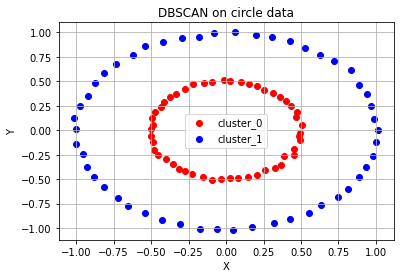

In [9]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0
 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1]


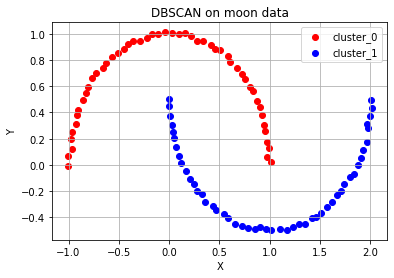

In [10]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


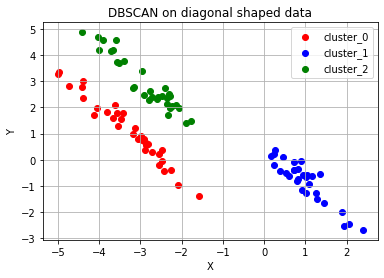

In [11]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

DBSCAN Y-hat 결과가 -1인 경우가 가끔 눈에 띄시나요? 어느 군집에도 포함되지 못한 **noise point** 가 존재한다는 것을 기억해 주세요.

위 코드에서 확인할 수 있듯이, epsilon과 minPts 값을 잘 조절해 주면 DBSCAN 알고리즘에 따라 클러스터의 수를 명시해 주지 않아도 적절한 클러스터의 개수를 설정하여 주어진 데이터에 대한 군집화를 수행할 수 있어요. 클러스터의 수를 지정해 주고, 데이터의 분포를 신경 써야 하는 K-means 알고리즘에 비해 훨씬 유연한 사용이 가능하기 때문에 DBSCAN은 굉장히 보편적으로 사용되는 군집화 알고리즘이에요.

그렇다면 모든 면에서 좋아보이는 DBSCAN의 단점은 없을까요?

### 3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교
---

# of samples: 100 / Elapsed time of K-means: 0.01723s / DBSCAN: 0.00157s
# of samples: 500 / Elapsed time of K-means: 0.01421s / DBSCAN: 0.00361s
# of samples: 1000 / Elapsed time of K-means: 0.01664s / DBSCAN: 0.00729s
# of samples: 2000 / Elapsed time of K-means: 0.02138s / DBSCAN: 0.03899s
# of samples: 5000 / Elapsed time of K-means: 0.05972s / DBSCAN: 0.15062s
# of samples: 7500 / Elapsed time of K-means: 0.10334s / DBSCAN: 0.20104s
# of samples: 10000 / Elapsed time of K-means: 0.69460s / DBSCAN: 0.23954s
# of samples: 20000 / Elapsed time of K-means: 0.18253s / DBSCAN: 0.67526s
# of samples: 30000 / Elapsed time of K-means: 0.62867s / DBSCAN: 1.62898s
# of samples: 40000 / Elapsed time of K-means: 0.35775s / DBSCAN: 2.11106s
# of samples: 50000 / Elapsed time of K-means: 0.37348s / DBSCAN: 3.35891s


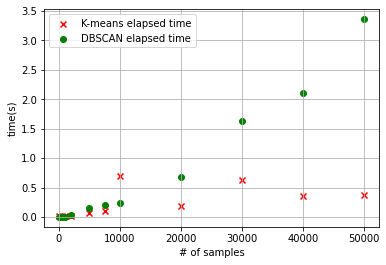

In [12]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()